In [ ]:
import networkx as nx
import random
import pandas as pd
from pyvis.network import Network

# 1) Load & name columns
df = pd.read_csv('../../soc-sign-bitcoinalpha.csv', header=None)
df.columns = ['source', 'target', 'weight', 'timestamp']

# 2) Build directed graph, casting to native int
G = nx.DiGraph()
for src, tgt, w, ts in zip(df['source'], df['target'], df['weight'], df['timestamp']):
    u = int(src)            # <-- cast here
    v = int(tgt)            # <-- and here
    G.add_edge(
        u,
        v,
        weight=int(w),      # optional: cast weight/timestamp too
        timestamp=int(ts)
    )

# 3) Sample and copy subgraph
N = 400
sampled = random.sample(list(G.nodes()), N)
subG = G.subgraph(sampled).copy()  # .copy() is important

# 4) Visualize with Pyvis
net = Network(
    height='600px', width='100%',
    directed=True, notebook=True,
    cdn_resources='in_line'
)
net.from_nx(subG)
net.write_html('bitcoin_alpha_sample.html')

FileNotFoundError: [Errno 2] No such file or directory: '../soc-sign-bitcoinalpha.csv'

In [25]:
import webbrowser

# gives you an absolute path to the file
import os
path = os.path.abspath("bitcoin_alpha_sample.html")

# opens it in your default web-browser
webbrowser.open(f"file://{path}")

True

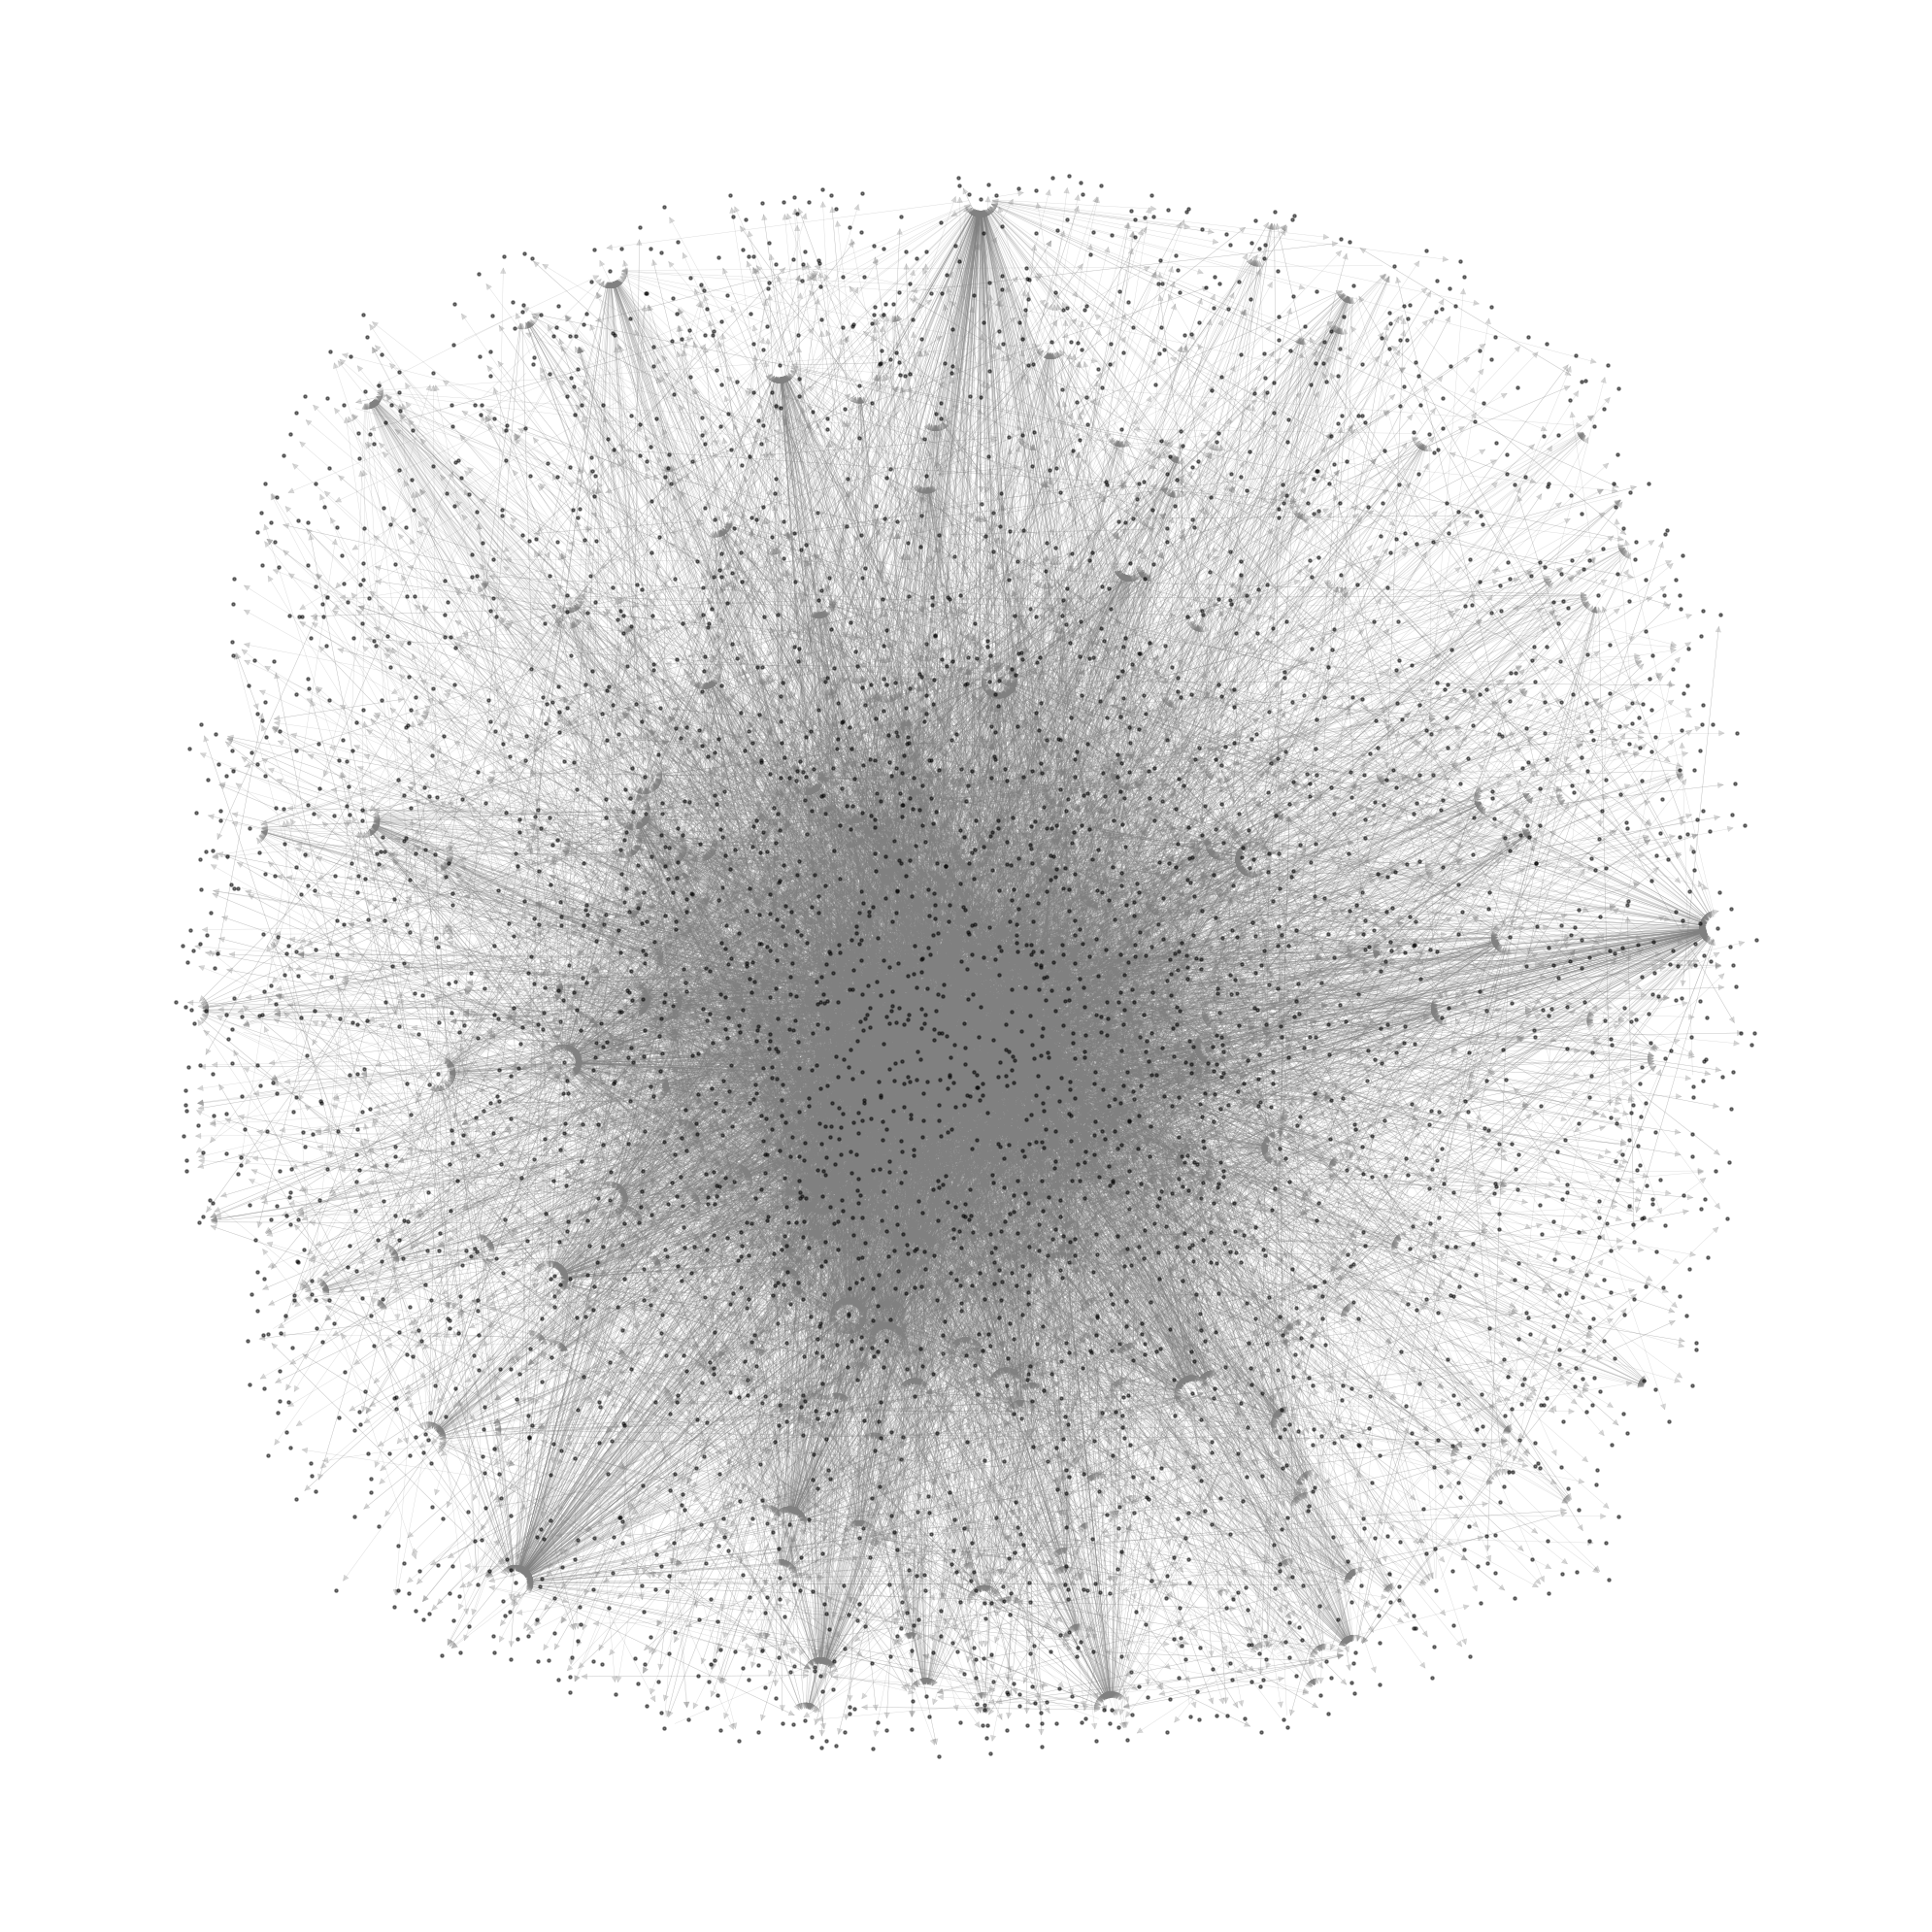

In [26]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load & build as before
df = pd.read_csv('soc-sign-bitcoinalpha.csv', header=None)
df.columns = ['source','target','weight','timestamp']

G = nx.DiGraph()
for src,tgt,w,ts in zip(df.source, df.target, df.weight, df.timestamp):
    G.add_edge(int(src), int(tgt), weight=int(w), timestamp=int(ts))

# 2) Choose a layout
#  - spring_layout: force‐directed, but limit iterations
#  - spectral_layout: very fast, no iteration
#  - graphviz via pygraphviz: use 'sfdp' for large graphs if installed
pos = nx.spring_layout(G, k=0.1, iterations=20)  
# pos = nx.spectral_layout(G)
# pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp')

# 3) Draw static figure
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(
    G, pos,
    node_size=5,
    node_color='black',
    alpha=0.5
)
nx.draw_networkx_edges(
    G, pos,
    edge_color='gray',
    width=0.3,
    alpha=0.3
)
plt.axis('off')
plt.tight_layout()
plt.savefig("bitcoin_alpha_static.png", dpi=300)
plt.show()
